# COVID Respiratory Modeling
In this notebook we will implement the mathematical model for viral particle deposition in the respiratory tract.

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [46]:
# Parameter table

# Airflow characteristics
rho_f = 1.2*10**(-4) # g cm^-3
mu = 1.81*10**(-4) # g cm^-1 s^-1
Q0 = 30 # L min^-1
g = 980 # cm s^-2
lamda = 0.066*10**(-4)
K_b = 1.38*10**(-16) 
T = 298 # K
# d_L = 

# Virus characteristics
C0 = 10^7 # Copies/mL
# A = 
d_p = 60 # nm
rho_p = 1.18 # g cm^-3
p = 8.2 # day^-1
c = 0.6 # day^-1
b = 3.9*10**(-7) # (Copies/mL)^-1 day^-1
d = 4.71 # day^-1

In [10]:
def velocity(Q,d):
    A = np.pi*(d/2)**2
    u = Q/A
    return u

In [88]:
final_generation = 23

# lengths: cm
# diameter: mm
lengths = [12, 4.76, 1.9, 1.76, 1.27, 1.07, 0.9, 0.76, 0.64, 0.54, 0.46, 0.39, 0.33, 0.27, 0.23, 0.2, 0.165, 0.14, 0.12, 0.099, 0.083, 0.07, 0.059, 0.05]
diameters = [1.8, 1.22, 0.83, 0.56, 0.45, 0.35, 0.28, 0.23, 0.186, 0.154, 0.13, 0.109, 0.095, 0.082, 0.074, 0.061, 0.06, 0.054, 0.05, 0.047, 0.045, 0.043, 0.041, 0.04]

lengths_SI = [0.01*element for element in lengths]
diameters_SI = [0.001*element for element in diameters]

Q = {}
u = {}
Q[0] = Q0
u[0] = velocity(Q0,diameters[0])
for i in range(1,final_generation+1):
        Q[i] = Q[i-1]/2
        u[i] = velocity(Q[i],diameters[i])
print(u)

{0: 11.789255043844099, 1: 12.831626693783553, 2: 13.861658565123706, 3: 15.225281545780803, 4: 11.789255043844099, 5: 9.744180189299717, 6: 7.612640772890401, 7: 5.641125109589863, 8: 4.312861577889116, 9: 3.145719327640662, 10: 2.2072153720214773, 11: 1.569814821444448, 12: 1.0332947309463427, 13: 0.6934477206120421, 14: 0.4257434690828499, 15: 0.3132721360787, 16: 0.16190078032622818, 17: 0.09993875328779517, 18: 0.05828428091744214, 19: 0.03298114583377215, 20: 0.01798897559180313, 21: 0.009850642394105285, 22: 0.005417560317281579, 23: 0.00284591215417198}


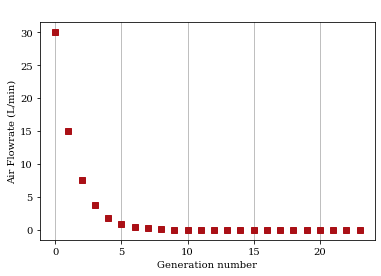

In [38]:
sns.reset_orig()
sns.set_palette(sns.color_palette())
sns.set_color_codes()
sns.set_style({'font.family':'serif', 'font.serif':'Helvetica'})

reds = sns.color_palette("Reds")
reds.reverse()

fig_flow, ax_flow = plt.subplots()
ax_flow.set_title(" ")
ax_flow.set_ylabel("Air Flowrate (L/min)")
ax_flow.set_xlabel("Generation number")
#ax_flow.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=myhandles, labels=mylabels)
#ax_flow.set(xlim=(11.4, 4.6))
#ax_flow.set(ylim=(50, 95))
ax_flow.xaxis.grid()

final_colors = [reds[0]]
final_lines = ['-']
final_markers = ['s']
final_labels = ["label"]
for i in range(final_generation+1):
    ax_flow.plot(i, Q[i], color=final_colors[0],
                 marker=final_markers[0], label=final_labels[0],
                 linestyle=final_lines[0])   
#fig_flow.savefig(os.path.join(outputdir, "Pressure_along_path_600dpi"), bbox_inches='tight', dpi=600)

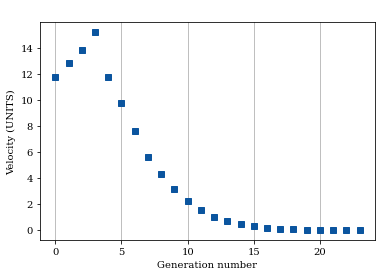

In [39]:
sns.reset_orig()
sns.set_palette(sns.color_palette())
sns.set_color_codes()
sns.set_style({'font.family':'serif', 'font.serif':'Helvetica'})

blues = sns.color_palette("Blues")
blues.reverse()

fig_flow, ax_flow = plt.subplots()
ax_flow.set_title(" ")
ax_flow.set_ylabel("Velocity (UNITS)")
ax_flow.set_xlabel("Generation number")
#ax_flow.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=myhandles, labels=mylabels)
#ax_flow.set(xlim=(11.4, 4.6))
#ax_flow.set(ylim=(50, 95))
ax_flow.xaxis.grid()

final_colors = [blues[0]]
final_lines = ['-']
final_markers = ['s']
final_labels = ["label"]
for i in range(final_generation+1):
    ax_flow.plot(i, u[i], color=final_colors[0],
                 marker=final_markers[0], label=final_labels[0],
                 linestyle=final_lines[0])   
#fig_flow.savefig(os.path.join(outputdir, "Pressure_along_path_600dpi"), bbox_inches='tight', dpi=600)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Define the expression whose roots we want to find

a = 0.5
R = 1.6

func = lambda tau : R - ((1.0 - np.exp(-tau))/(1.0 - np.exp(-a*tau))) 

# Plot it

tau = np.linspace(-0.5, 1.5, 201)

plt.plot(tau, func(tau))
plt.xlabel("tau")
plt.ylabel("expression value")
plt.grid()
plt.show()

# Use the numerical solver to find the roots

tau_initial_guess = 0.5
tau_solution = fsolve(func, tau_initial_guess)

print "The solution is tau = %f" % tau_solution
print "at which the value of the expression is %f" % func(tau_solution)

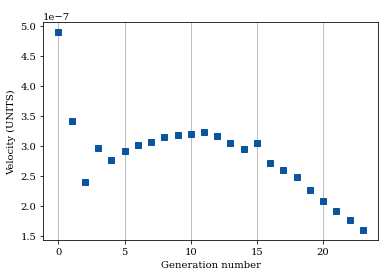

In [92]:
#test cell 

def impaction(L,d,u):
    k_I = (1.3*rho_p*d_p**2*u)/(L*18*mu*d)
    return k_I

def diffusivity(d_p):
    D = (K_b*T)/(3*np.pi*mu*d_p)
    return D

def beta_diffusion(L,Q):
    D = diffusivity(d_p)
    B = np.pi*D*L/(4*Q)
    return B

def diffusion(L,Q):
    B = beta_diffusion(L,Q)
    k_d = 1 - 0.819*np.exp(-14.63*B) - 0.0976*np.exp(-89.22*B) - 0.0325*np.exp(-228*B) - 0.0509*np.exp(-125.9*B**(2/3))
    return k_d

k_I = {}
k_d = {}
for i in range(0,final_generation+1):
        k_I[i] = impaction(lengths[i],diameters[i],u[i])
        k_d[i] = diffusion(lengths_SI[i],diameters_SI[i])

sns.reset_orig()
sns.set_palette(sns.color_palette())
sns.set_color_codes()
sns.set_style({'font.family':'serif', 'font.serif':'Helvetica'})

blues = sns.color_palette("Blues")
blues.reverse()

fig_flow, ax_flow = plt.subplots()
ax_flow.set_title(" ")
ax_flow.set_ylabel("Velocity (UNITS)")
ax_flow.set_xlabel("Generation number")
#ax_flow.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=myhandles, labels=mylabels)
#ax_flow.set(xlim=(11.4, 4.6))
#ax_flow.set(ylim=(50, 95))
ax_flow.xaxis.grid()

final_colors = [blues[0]]
final_lines = ['-']
final_markers = ['s']
final_labels = ["label"]
for i in range(final_generation+1):
    ax_flow.plot(i, k_d[i], color=final_colors[0],
                 marker=final_markers[0], label=final_labels[0],
                 linestyle=final_lines[0])   
#fig_flow.savefig(os.path.join(outputdir, "Pressure_along_path_600dpi"), bbox_inches='tight', dpi=600)

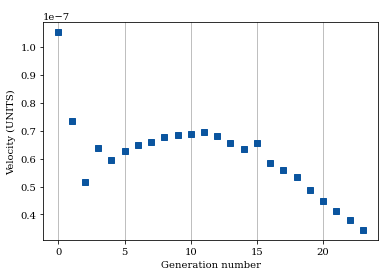

In [93]:
#test cell 

def impaction(L,d,u):
    k_I = (1.3*rho_p*d_p**2*u)/(L*18*mu*d)
    return k_I

def diffusivity(d_p):
    D = (K_b*T)/(3*np.pi*mu*d_p)
    return D

def beta_diffusion(L,Q):
    D = diffusivity(d_p)
    B = np.pi*D*L/(4*Q)
    return B

def diffusion(L,Q):
    B = beta_diffusion(L,Q)
    k_d = 1 - 0.819*np.exp(-14.63*B) - 0.0976*np.exp(-89.22*B) - 0.0325*np.exp(-228*B) - 0.0509*np.exp(-125.9*B**(2/3))
    return k_d

k_I = {}
k_d = {}
for i in range(0,final_generation+1):
        k_I[i] = impaction(lengths[i],diameters[i],u[i])
        k_d[i] = diffusion(lengths[i],diameters[i])

sns.reset_orig()
sns.set_palette(sns.color_palette())
sns.set_color_codes()
sns.set_style({'font.family':'serif', 'font.serif':'Helvetica'})

blues = sns.color_palette("Blues")
blues.reverse()

fig_flow, ax_flow = plt.subplots()
ax_flow.set_title(" ")
ax_flow.set_ylabel("Velocity (UNITS)")
ax_flow.set_xlabel("Generation number")
#ax_flow.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=myhandles, labels=mylabels)
#ax_flow.set(xlim=(11.4, 4.6))
#ax_flow.set(ylim=(50, 95))
ax_flow.xaxis.grid()

final_colors = [blues[0]]
final_lines = ['-']
final_markers = ['s']
final_labels = ["label"]
for i in range(final_generation+1):
    ax_flow.plot(i, k_d[i], color=final_colors[0],
                 marker=final_markers[0], label=final_labels[0],
                 linestyle=final_lines[0])   
#fig_flow.savefig(os.path.join(outputdir, "Pressure_along_path_600dpi"), bbox_inches='tight', dpi=600)

In [69]:




def Beta(L,d,u):
    B = (3*np.pi*L*u_g)/16*u*d
    return B

def impaction(L,d,u):
    k_I = (1.3*rho_p*d_p**2*u)/(L*18*mu*d)
    return k_I

def sedimentation(L,d,Q,u):
    B = Beta(L,d,u)
    k_S = ((2*Q)/(np.pi*L)) * (2*B*sqrt(1-B**(2/3)) - B**(1/3)*sqrt(1-B**(2/3)) + sin(B**(1/3))**(-1)) 
    return k_S

k_I = {}
k_S = {}
for i in range(0,final_generation+1):
        k_I[i] = impaction(lengths[i],diameters[i],u[i])
        k_S[i] = sedimentation(lengths[i],diameters[i],Q[i],u[i])
        
def beta(L,d,u):
    B = (3*np.pi*L*u_g)/16*u*d
    return B

def particle_reynolds():
    Re = rho*u_pt*d_p/miu
    return Re

def diffusivity(d_p):
    D=(K_b*T)/(3*np.pi*mu*d_p)
    return D

def beta_diffusion(L,Q):
    D = diffusivity(d_p)
    B = np.pi*D*L/(4*Q)
    return B

def diffusion(L,Q):
    B = beta_diffusion(L,Q)
    k_d = 1 - 0.819*np.exp(-14.63*B) - 0.0976*np.exp(-89.22*B) - 0.0325*np.exp(-228*B) - 0.0509*np.exp(-125.9*B**(2/3))
    return k_d


k_I = (1.3*rho_p*d_p**2*u)/(L*18*m*d_L)
k_S = (2*Q)/(pi*L) * (2*B*sqrt(1-B**(2/3)) - B**(1/3)*sqrt(1-B**(2/3)) + sin(B**(1/3))**(-1)) 

NameError: name 'u_g' is not defined

In [50]:
u

{0: 11.789255043844099,
 1: 12.831626693783553,
 2: 13.861658565123706,
 3: 15.225281545780803,
 4: 11.789255043844099,
 5: 9.744180189299717,
 6: 7.612640772890401,
 7: 5.641125109589863,
 8: 4.312861577889116,
 9: 3.145719327640662,
 10: 2.2072153720214773,
 11: 1.569814821444448,
 12: 1.0332947309463427,
 13: 0.6934477206120421,
 14: 0.4257434690828499,
 15: 0.3132721360787,
 16: 0.16190078032622818,
 17: 0.09993875328779517,
 18: 0.05828428091744214,
 19: 0.03298114583377215,
 20: 0.01798897559180313,
 21: 0.009850642394105285,
 22: 0.005417560317281579,
 23: 0.00284591215417198}